In [1]:
import pandas as pd

# Load the data
data_path = "./Resources/Philadelphia_Eagles_2024_Season.csv"
eagles_data = pd.read_csv(data_path)

# Preview the first few rows
eagles_data.head()

,Game Date,Opponent,Location,Result,Points For,Points Against,Total Yards,Passing Yards,Rushing Yards,Turnovers
0,2024-09-08,Washington Commanders,Home,Win,30,20,385,220,165,1
1,2024-09-15,Dallas Cowboys,Away,Loss,14,24,325,200,125,2
2,2024-09-22,New York Giants,Home,Win,28,14,410,250,160,0
3,2024-09-29,Seattle Seahawks,Away,Win,27,17,390,240,150,1
4,2024-10-06,San Francisco 49ers,Home,Loss,21,27,365,210,155,3


In [2]:
# Check the structure and data types
eagles_data.info()

# Summary statistics
eagles_data.describe()

# Check for missing values
eagles_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Game Date       9 non-null      object
 1   Opponent        9 non-null      object
 2   Location        9 non-null      object
 3   Result          9 non-null      object
 4   Points For      9 non-null      int64 
 5   Points Against  9 non-null      int64 
 6   Total Yards     9 non-null      int64 
 7   Passing Yards   9 non-null      int64 
 8   Rushing Yards   9 non-null      int64 
 9   Turnovers       9 non-null      int64 
dtypes: int64(6), object(4)
memory usage: 852.0+ bytes


Game Date         0
Opponent          0
Location          0
Result            0
Points For        0
Points Against    0
Total Yards       0
Passing Yards     0
Rushing Yards     0
Turnovers         0
dtype: int64

Result
Win     7
Loss    2
Name: count, dtype: int64


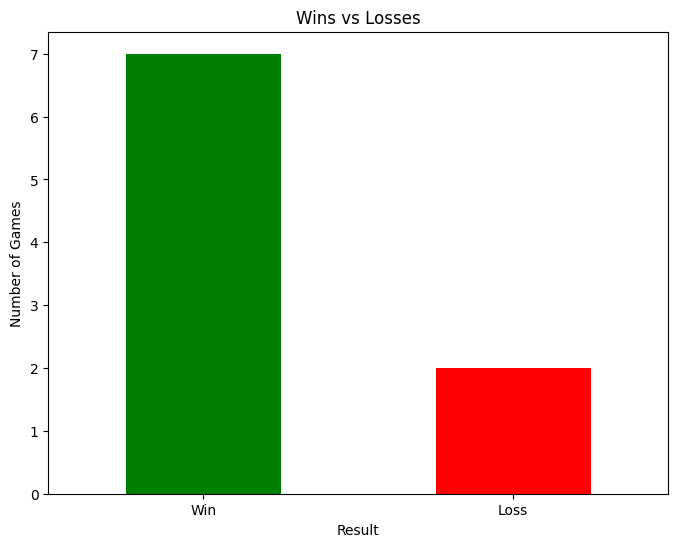

In [3]:
# Count Wins and Losses
win_loss_count = eagles_data["Result"].value_counts()
print(win_loss_count)

# Plot the results
import matplotlib.pyplot as plt

win_loss_count.plot(kind="bar", color=["green", "red"], figsize=(8, 6))
plt.title("Wins vs Losses")
plt.xlabel("Result")
plt.ylabel("Number of Games")
plt.xticks(rotation=0)
plt.show()

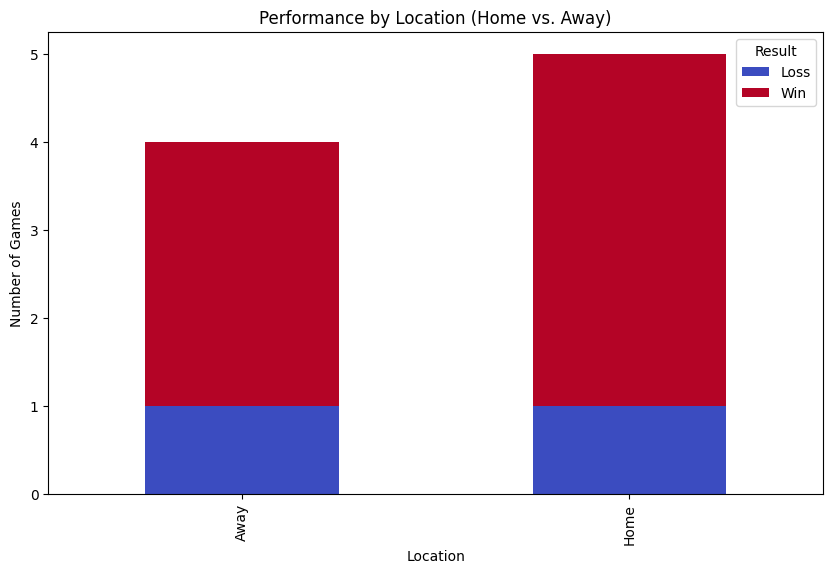

In [4]:
# Group by Location and Result
location_performance = eagles_data.groupby(["Location", "Result"]).size().unstack()

# Plot performance
location_performance.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.title("Performance by Location (Home vs. Away)")
plt.ylabel("Number of Games")
plt.xlabel("Location")
plt.show()

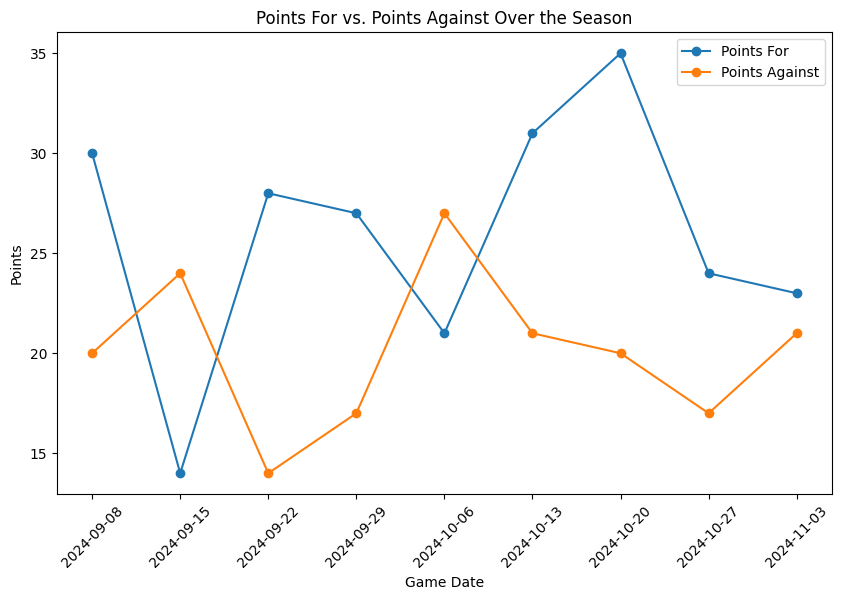

In [5]:
# Line plot for Points For vs. Points Against
plt.figure(figsize=(10, 6))
plt.plot(eagles_data["Game Date"], eagles_data["Points For"], label="Points For", marker="o")
plt.plot(eagles_data["Game Date"], eagles_data["Points Against"], label="Points Against", marker="o")
plt.title("Points For vs. Points Against Over the Season")
plt.xlabel("Game Date")
plt.ylabel("Points")
plt.xticks(rotation=45)
plt.legend()
plt.show()

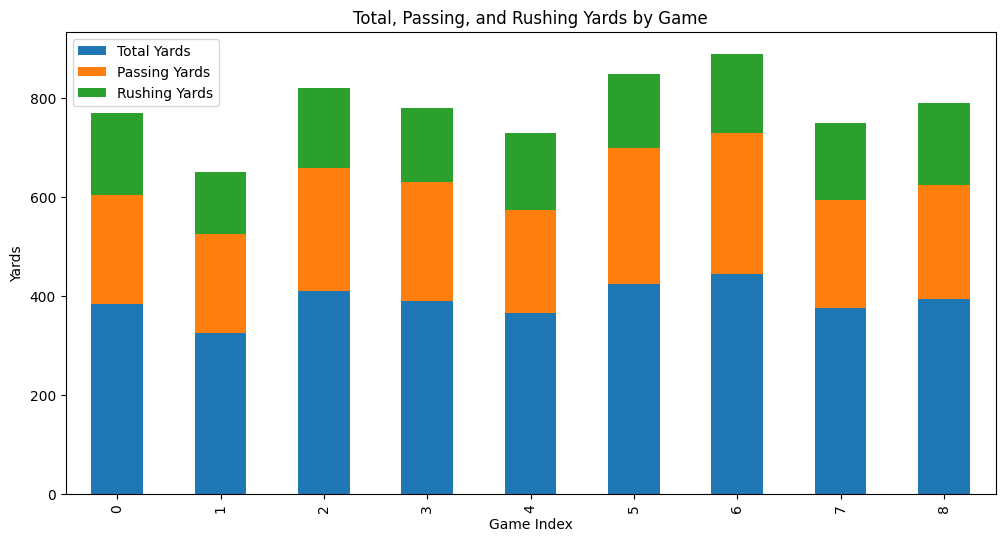

In [6]:
# Bar plot for Total, Passing, and Rushing Yards
eagles_data[["Total Yards", "Passing Yards", "Rushing Yards"]].plot(kind="bar", figsize=(12, 6), stacked=True)
plt.title("Total, Passing, and Rushing Yards by Game")
plt.xlabel("Game Index")
plt.ylabel("Yards")
plt.legend()
plt.show()

/var/folders/7r/llhq8th56k73wjyrcv5w381h0000gn/T/ipykernel_22384/4116590286.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Result", y="Turnovers", data=eagles_data, palette="Set2")


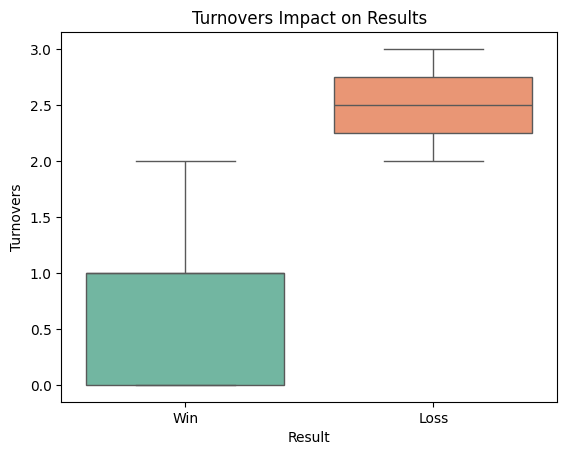

In [7]:
# Boxplot to see turnovers distribution by result
import seaborn as sns

sns.boxplot(x="Result", y="Turnovers", data=eagles_data, palette="Set2")
plt.title("Turnovers Impact on Results")
plt.show()

In [8]:
# Select only numeric columns for correlation analysis
numeric_data = eagles_data.select_dtypes(include="number")

# Calculate correlation
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                Points For  Points Against  Total Yards  Passing Yards  \
Points For        1.000000       -0.465170     0.926996       0.848906   
Points Against   -0.465170        1.000000    -0.432933      -0.381065   
Total Yards       0.926996       -0.432933     1.000000       0.944838   
Passing Yards     0.848906       -0.381065     0.944838       1.000000   
Rushing Yards     0.649983       -0.339979     0.632400       0.343792   
Turnovers        -0.532239        0.576222    -0.646549      -0.623815   

                Rushing Yards  Turnovers  
Points For           0.649983  -0.532239  
Points Against      -0.339979   0.576222  
Total Yards          0.632400  -0.646549  
Passing Yards        0.343792  -0.623815  
Rushing Yards        1.000000  -0.378295  
Turnovers           -0.378295   1.000000  


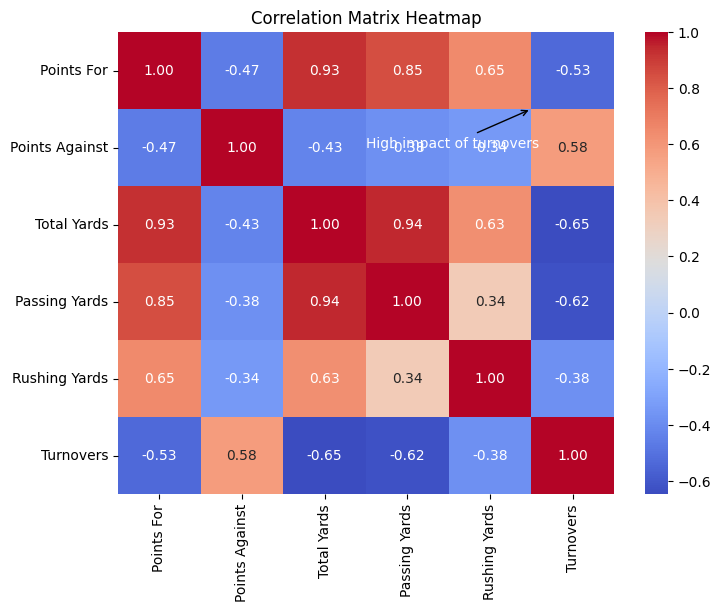

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.annotate("High impact of turnovers", xy=(5, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', arrowstyle="->"), color="white")
plt.title("Correlation Matrix Heatmap")
plt.show()

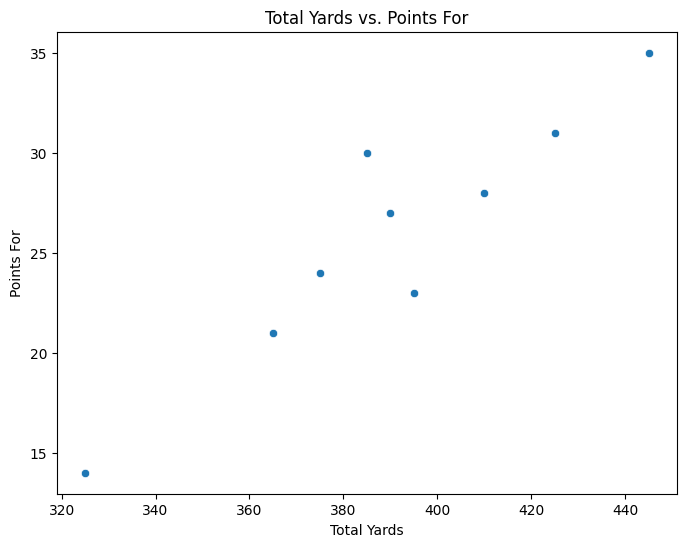

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Total Yards", y="Points For", data=numeric_data)
plt.title("Total Yards vs. Points For")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features and target variable
features = eagles_data[["Total Yards", "Passing Yards", "Rushing Yards", "Turnovers"]]
target = eagles_data["Points For"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.27199189663799833


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Project Wrap-Up Summary: 2024 Eagles Performance Analysis

## Key Objectives:
1. **Analyze Wins vs Losses:**
   - Investigated the win-loss record for the Eagles' 2024 season.
   - Highlighted performance differences in games played at home versus away.

2. **Statistical Insights:**
   - Explored the relationship between total yards, passing yards, rushing yards, and turnovers with game outcomes.
   - Evaluated the impact of turnovers on wins and losses using box plots.

3. **Regression Analysis:**
   - Developed a predictive model using linear regression to estimate future game performance.
   - Achieved a Root Mean Squared Error (RMSE) of `0.27199189663799833` in predicting "Points For" based on total yards, passing yards, rushing yards, and turnovers.

4. **Visualizations:**
   - Created informative visualizations, including bar plots, scatter plots, and heatmaps, to better understand team performance metrics.

## Key Findings:
- Higher total yards and rushing yards are strongly correlated with higher "Points For."
- Turnovers have a notable negative impact on game outcomes, particularly in losses.
- The team's performance at home has been slightly stronger than away games.

---

Thank you for reviewing this analysis! Suggestions for further improvement are welcome.